## Case Study 2 Part B Question 6

- ### This is to identify the performance trend for each runner.
- ### Performance trend is measured by the average speed over time.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('runner_data.csv')
print(df.head())
print()
print(df.info())

   runner_id  order_id  distance  duration  avg_speed
0          1         1      20.0        32       0.63
1          1         2      20.0        27       0.74
2          1         3      13.4        20       0.67
3          1        10      10.0        10       1.00
4          2         4      23.4        40       0.59

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   runner_id  8 non-null      int64  
 1   order_id   8 non-null      int64  
 2   distance   8 non-null      float64
 3   duration   8 non-null      int64  
 4   avg_speed  8 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 452.0 bytes
None


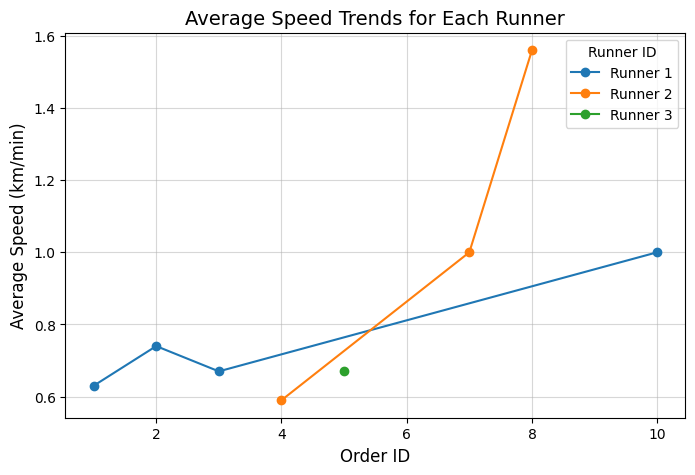

In [44]:
plt.figure(figsize=(8, 5))

#looping through each unique runner_id for ploting a line graph
for runner_id in df['runner_id'].unique():
    #extract rows where runner_id is the current runner_id for plotting
    runner_data = df[df['runner_id'] == runner_id]
    #plot(x-axis, y-axis, marker, label)
    plt.plot(runner_data['order_id'], runner_data['avg_speed'], marker='o', label=f'Runner {runner_id}')

plt.title("Average Speed Trends for Each Runner", fontsize=14)
plt.xlabel("Order ID", fontsize=12)
plt.ylabel("Average Speed (km/min)", fontsize=12)
plt.legend(title="Runner ID")
plt.grid(alpha=0.5)
plt.show()